# Namespaces and scopes

Every time you perform an assignment like `x = ...`, the variable x is added to some __namespace__ (unless it is already definedin the current scope). A namespace is a list of names pointing to some object - essentially, it's a dictionary. Keep in mind that multiple names can point to the same object!

Many namespaces exist in Python: _built-in_, _global_ and _local_. These namespace have different life-spans, meaning that they are created and destroyed at different times.
1. __Built-in:__ the built-in namespace contains names that are available at any execution of Python.
2. __Global:__ when you run a script, Python creates its _global_ namespace, which gets destroyed only when execution of the script is terminated. _Advanced stuff: Python creates a global namespace also for every imported module._
3. __Local:__ when you call a function, Python creates its _local_ namespace. This gets destroyed when the function returns (which is, when execution of the function call is over).

For the time being, we will ignore the built-in namespace.

Let us make an example: we create a variable `x` in our script, then we declare a function `f` and we declare a variable y inside of it.

In [1]:
x = 'cat'

def f():
    y = 'dog'

Variable `x` is written to the global namespace, whereas variable `y` will be written to the local namespace of function `f`, but only when `f` is called. We are now going to call function `f`:

In [2]:
f()

As we call it, Python creates its local namespace with `y` inside. However, when the function returns, the namespace is destroyed; in general, we cannot access `y` from outside the function.

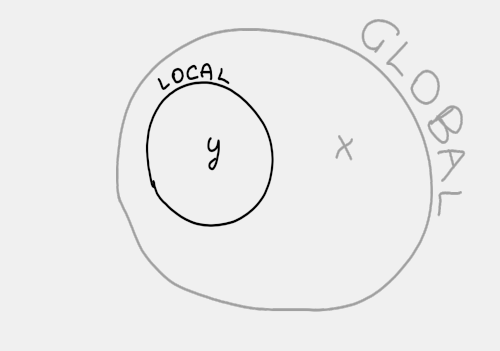

In [3]:
print(y)

NameError: name 'y' is not defined

Variable `x`, instead, is always accessible within the script:

In [4]:
print(x)

cat


## Scopes

What we can also do, is to create another variable `x` in the local namespace of the function (by declaring it in the function itself). The two variables `x` in global and local namespaces are different: for clarity, we are going to call them `global.x` (defined in the script) and `local.x` (defined in the function). Python always calls them `x`, though.

Because `global.x` and `local.x` are different, any modification made to `local.x` inside the function does not affect `global.x`:

In [5]:
def f():
    x = "dog"
    print("This is x inside the function:", x)

In [6]:
f()
print("This is x in the script:", x)

This is x inside the function: dog
This is x in the script: cat


Again, `x = "dog"` inside the function only changed `local.x`, but not `global.x`.

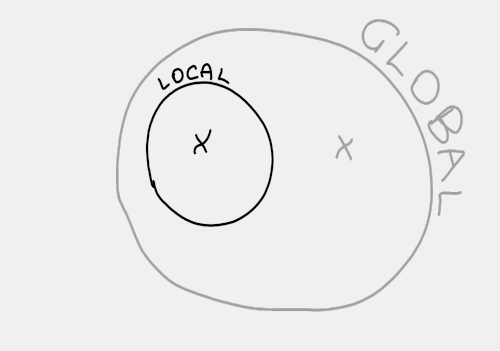

So, how does Python determine which `x` we are talking about? Here, the concept of scope comes into play; a scope is where a given name is valid - but this is an advanced topic. What you need to know is how Python looks for variable names when reading or writing a variable.

### Reading
When you are trying to read the value of a variable (eg. when calling `print(x)`):
1. If you are in a function, Python looks for `x` in the local namespace.
2. If step 1. fails, or if you are not in a function, Python looks for x in the global namespace.


### Writing
As you might have noticed, Python always writes to `global.x` - unless you are inside of a function. Inside of a function, Python writes to `local.x` by default. We saw this in the previous example.
There is a trick though, to access global variables from within a function: the keyword `global`.
Here is an example:

In [7]:
def f():
    global x
    x = "canary"

What `f` now does is simply changing the value of `global.x`:

In [8]:
print("This is global.x, before calling f:", x)
f()
print("This is global.x, after calling f:", x)

This is global.x, before calling f: cat
This is global.x, after calling f: canary


# Warning
_It is good programming practice to avoid using the `global` keyword. Sometimes though, you are (more or less) forced to, like in the last example._